# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import uniform
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
mu, sigma = 50, 5

In [3]:
# 1. Size 10
a = np.random.normal(mu, sigma, 10)
stats.normaltest(a)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.4239457784304708, pvalue=0.8089866295315927)

In [4]:
# 2. Size 50
b = np.random.normal(mu, sigma, 50)
stats.normaltest(b)

NormaltestResult(statistic=1.6814092202901643, pvalue=0.43140644295620667)

In [5]:
# 3. Size 500
c = np.random.normal(mu, sigma, 500)
stats.normaltest(c)

NormaltestResult(statistic=2.0897455711051007, pvalue=0.3517365625044673)

In [6]:
# 4. Size 5000
d = np.random.normal(mu, sigma, 5000)
stats.normaltest(d)

NormaltestResult(statistic=1.0222617867060082, pvalue=0.5998168662018037)

#### Interpret the normaltest results and make your observations.

### Explain the test results here
 
#### Test 1
**size 10:** (statistic=0.6596095715028819, pvalue=0.7190640912878004)  
**size 50:** (statistic=0.18552454926559073, pvalue=0.911410139854932)  
**size 500:** (statistic=0.2542121961897047, pvalue=0.8806402333893707)  
**size 5000:** (statistic=9.619776265596096, pvalue=0.008148771226930425)  
 
#### Test 2
**size 10:** (statistic=3.0755774528105366, pvalue=0.21485568121526957)  
**size 50:** (statistic=1.3847247449802245, pvalue=0.5003925580561328)  
**size 500:** (statistic=0.31785311149426154, pvalue=0.8530590089500285)  
**size 5000:** (statistic=2.8854449534944933, pvalue=0.23628360561207523)  
  
statistic: 
pvalue: represents the probability that the data came from a normal distribution.  
As we can see from the two different tests, the values aren't affected by the sample size, and a rather random.  

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

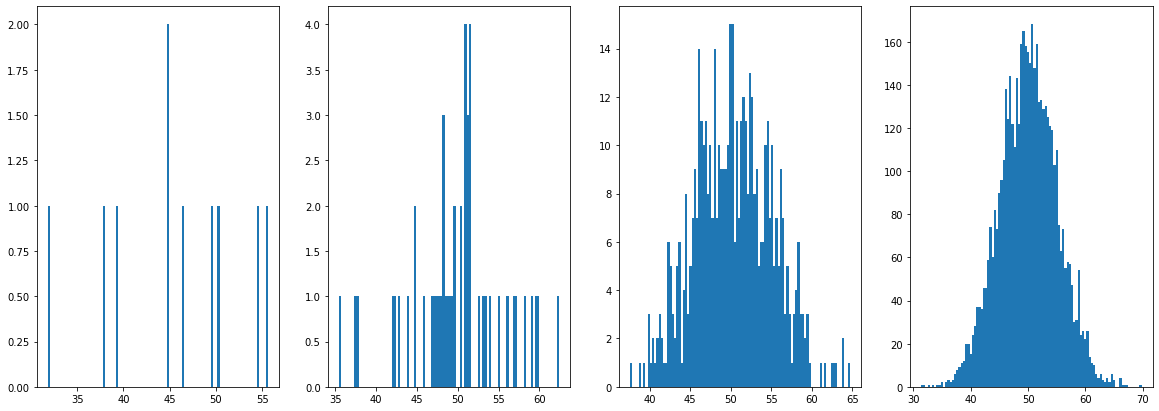

In [22]:
plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.hist(a,bins=100)
plt.subplot(1,4,2)
plt.hist(b,bins=100)
plt.subplot(1,4,3)
plt.hist(c,bins=100)
plt.subplot(1,4,4)
plt.hist(d,bins=100)
plt.show()

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

"The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed"   
As we can see in the graphs above, the greater the sample, the more normally distributed the data is, this is in accordance to the Central Limit Theorem.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

In [ ]:
# Your code here


#### Explain what you observe from the plot above

In [ ]:
# Your comment here

#### Now plot PMP with 50, 500, and 5000 visitors.

In [ ]:
# Your code here

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here
